In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
digit = load_digits()
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
df = pd.DataFrame(digit.data, columns=digit.feature_names)
df['target'] = digit.target
df['target_names'] = df.target.apply(lambda x: digit.target_names[x])
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,target_names
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9,9


In [5]:
df.target.value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [6]:
X = digit.data
Y = digit.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1, stratify=Y)
X_train.shape, X_test.shape

((1257, 64), (540, 64))

# Random Forest Classifier

In [7]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [8]:
rfc.score(X_test, Y_test), rfc.score(X_train, Y_train)

(0.9629629629629629, 1.0)

# Decision Tree Classifier

In [9]:
dtc = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.01189405)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.01189405, criterion='entropy')

In [10]:
dtc.score(X_test, Y_test), dtc.score(X_train, Y_train)

(0.8425925925925926, 0.9180588703261734)

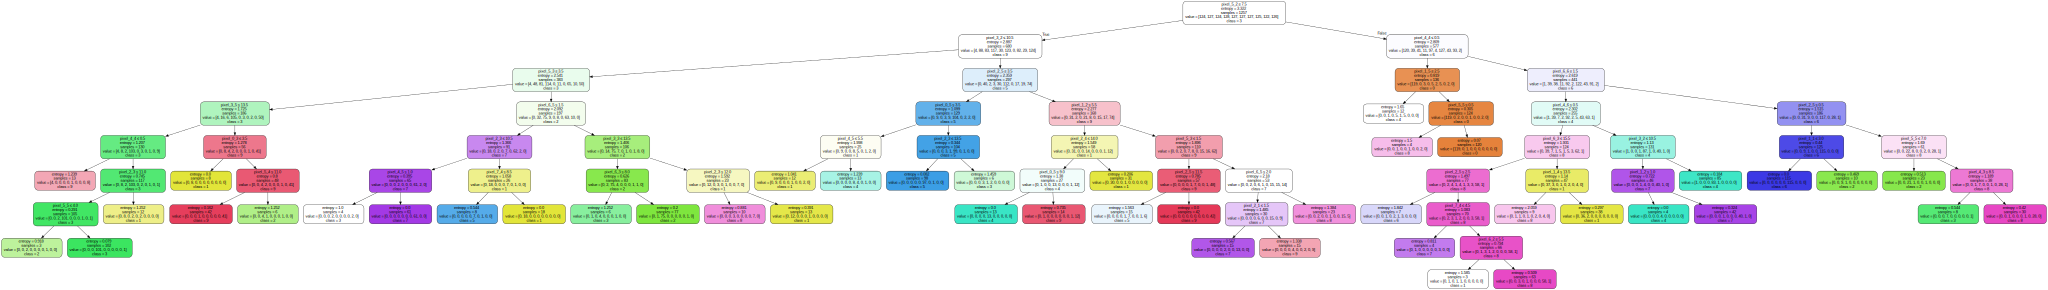

<Figure size 100x100 with 0 Axes>

In [11]:
import graphviz
dot = export_graphviz(dtc, feature_names=digit.feature_names, class_names=digit.target_names.astype('str'), 
                      impurity=True, filled=True, rounded=True, special_characters=True)

plt.figure(figsize=(1,1))
graph = graphviz.Source(dot)
graph

In [12]:
path = dtc.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[(ccp_alphas>0.01) & (ccp_alphas<0.02)]
ccp_alphas

array([0.01029509, 0.01081534, 0.01241566, 0.01272282, 0.01509915,
       0.01559787, 0.01563525, 0.0160062 , 0.01694745, 0.01699403,
       0.01724656, 0.01807234, 0.01841908, 0.01869011, 0.01887649,
       0.01916555])

In [13]:
train_scores = []
test_scores = []
for i in ccp_alphas:
    dtc = DecisionTreeClassifier(ccp_alpha=i, random_state=42)
    dtc.fit(X_train, Y_train)
    
    train_score = dtc.score(X_train, Y_train)
    mean_test_score = np.mean(cross_val_score(dtc, X, Y, cv=5))

    train_scores.append(train_score)
    test_scores.append(mean_test_score)

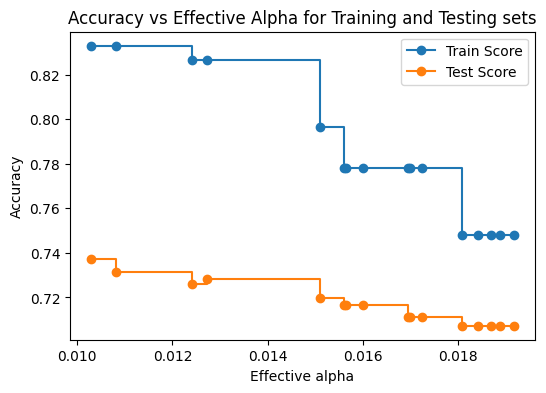

In [14]:
plt.figure(figsize=(6, 4))

plt.plot(ccp_alphas, train_scores, marker='o', label='Train Score', drawstyle='steps-post')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Score', drawstyle='steps-post')

plt.xlabel("Effective alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Effective Alpha for Training and Testing sets")
plt.legend()